In [ ]:
import pandas as pd
import numpy as nm
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, linear_model, metrics
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
from  google.colab import files
upload= files.upload()


Saving 123.csv to 123.csv


In [ ]:
dataset=pd.read_csv('PulmonaryDisease5.csv')
d2=pd.read_csv('123.csv')

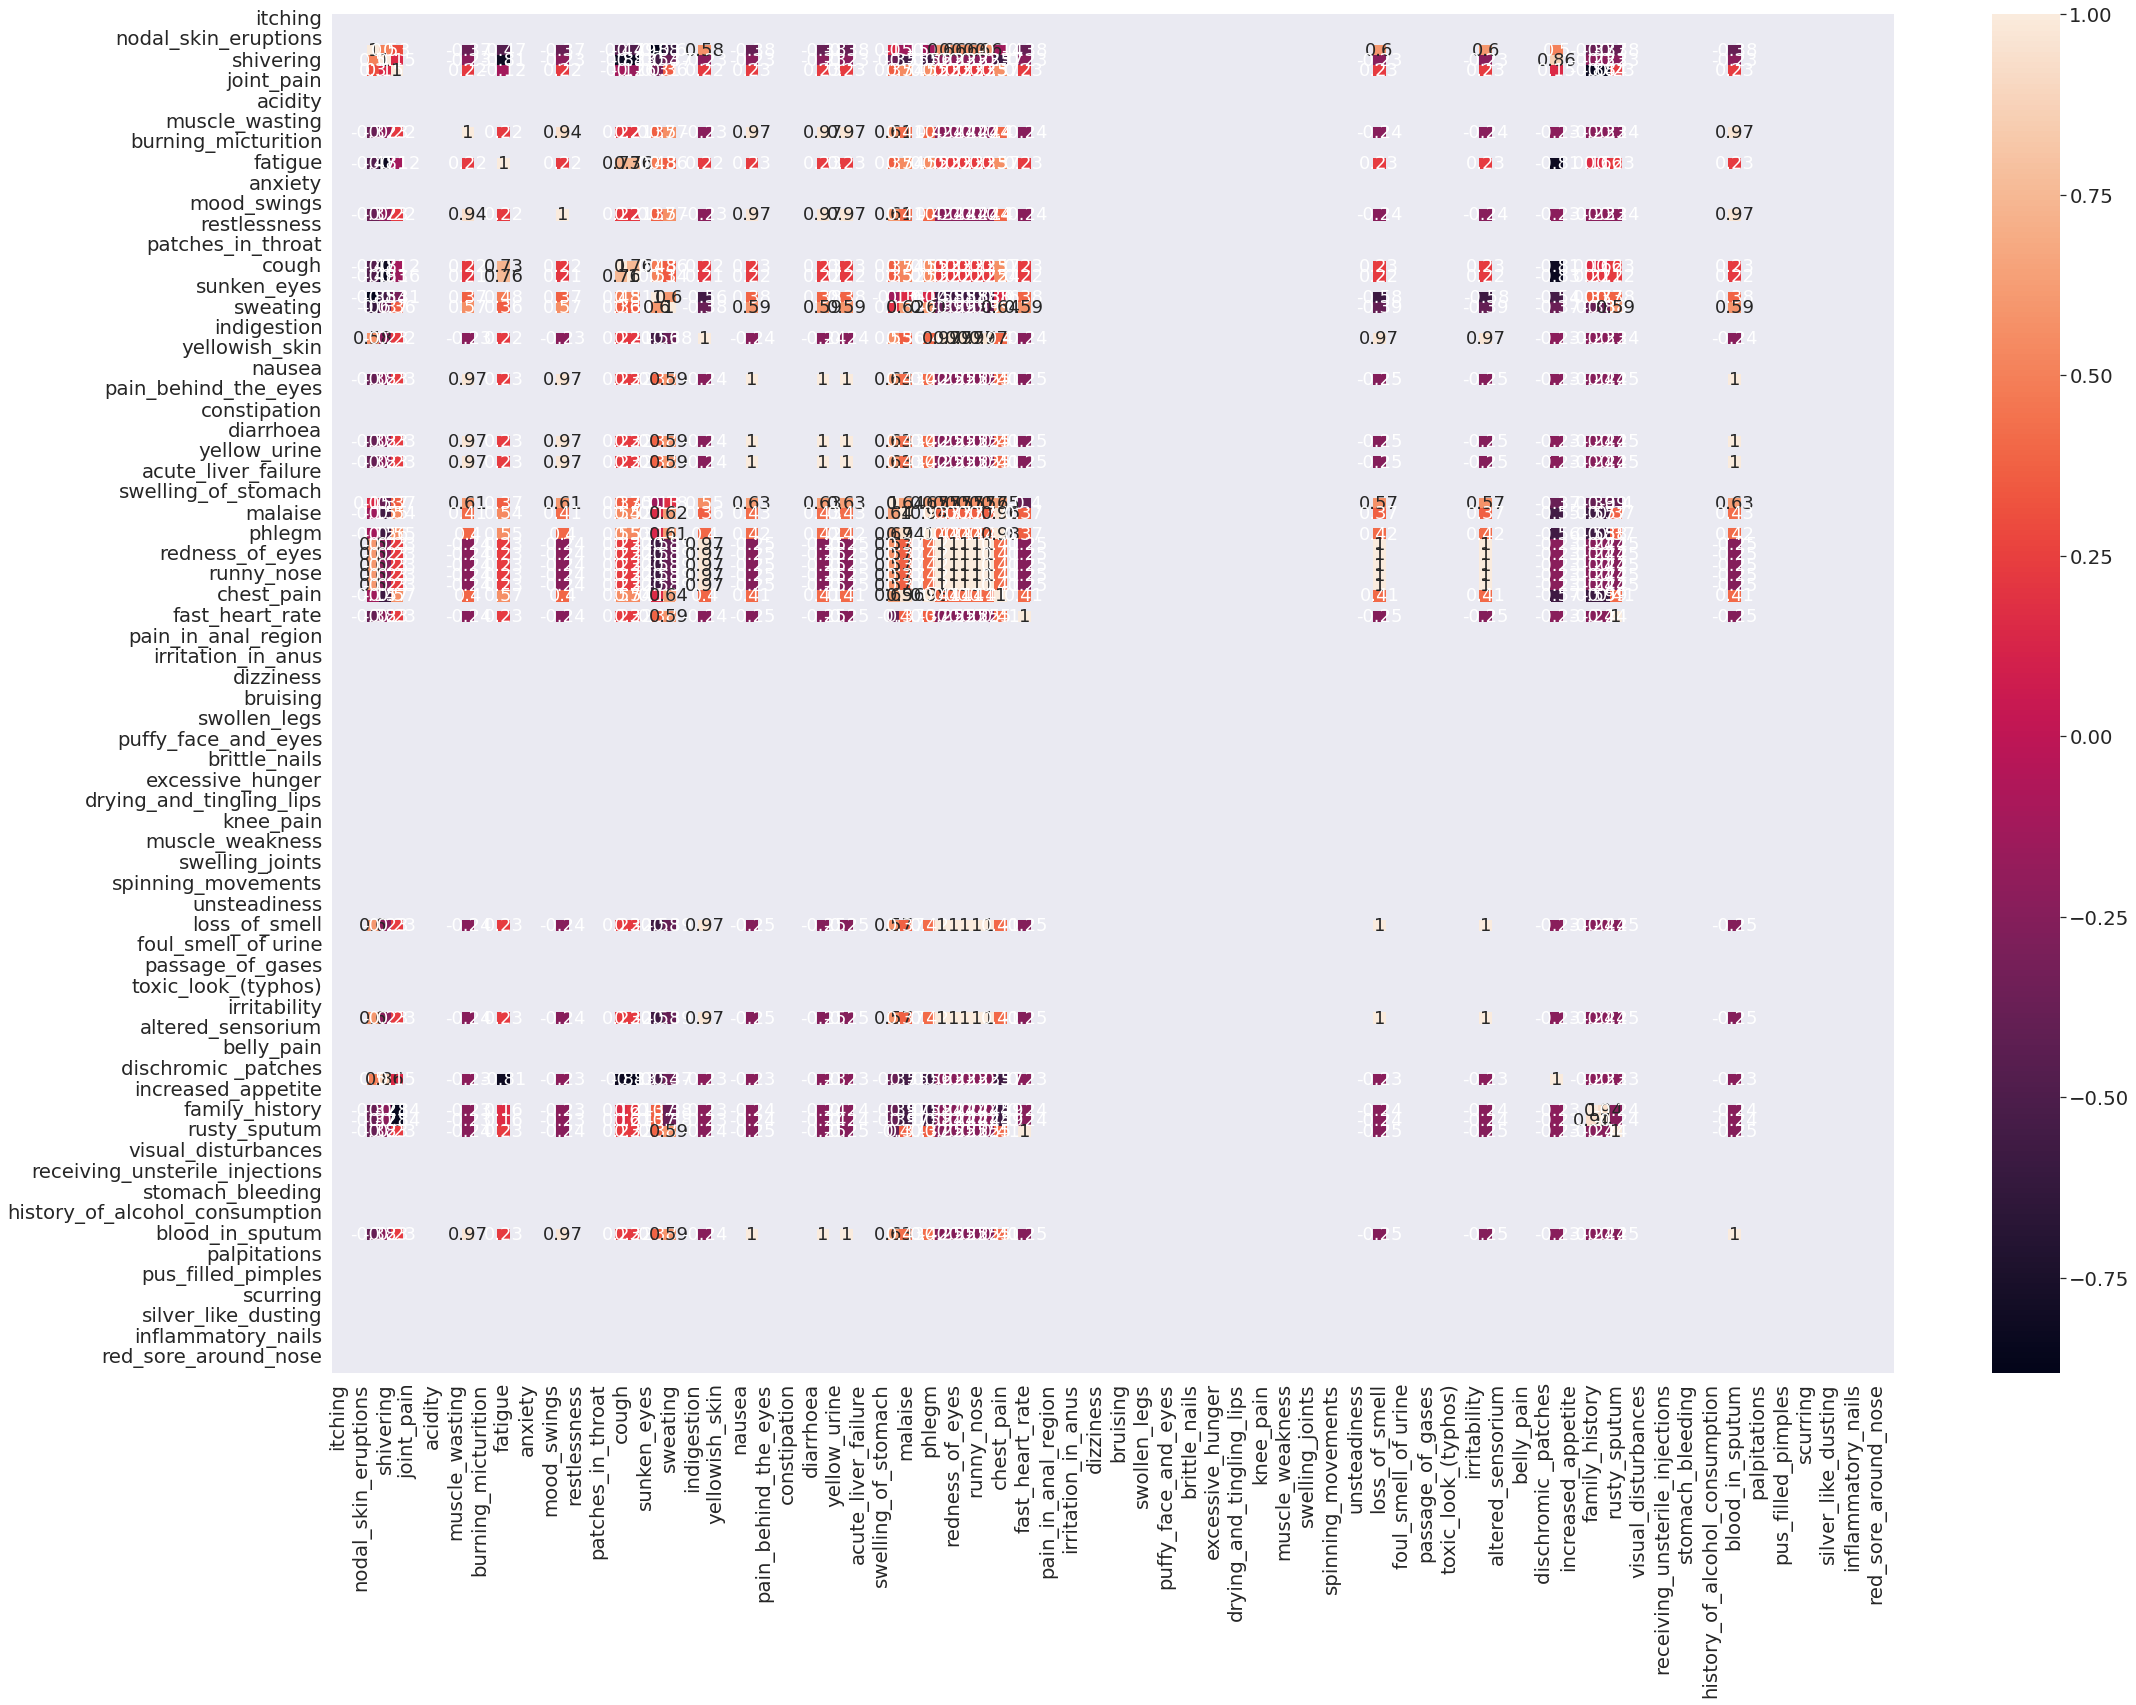

In [ ]:
m=d2.corr()
plt.figure(figsize=(35,25))
sn.set(font_scale=1.8)
sn.heatmap(m, annot=True,cmap='rocket',annot_kws={"size":18})
plt.show()

In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=10)
dataset= pd.DataFrame(imputer.fit_transform(dataset),columns=dataset.columns)

In [ ]:
dataset.columns

Index(['cough', 'breathlessness', 'headache', 'mild_fever',
       'throat_irritation', 'runny_nose', 'sinus_pressure', 'chest_pain',
       'blood_in_sputum', 'prognosis'],
      dtype='object')

In [ ]:
y=dataset[['cough', 'breathlessness', 'headache', 'mild_fever',
       'throat_irritation', 'runny_nose', 'sinus_pressure',
       'chest_pain', 'blood_in_sputum']]

In [ ]:
y.shape

(720, 9)

In [ ]:
x=dataset['prognosis']


In [ ]:
x.shape

(720,)

In [ ]:
y.shape

(720, 9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    y, x, test_size=0.2, random_state=42
)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


User Defined Functions

In [ ]:
def ResultPrint(acc, prec, recall, f1, model_name):
  print('Pulmonary Disease Categorization:\n')
  print('Model:',model_name,'\nAccuracy =', format(ac,".4f"),
      '\nPrecision=',format(prec, ".4f"),'\nRecall=', format(rec, ".4f"),'\nF1 Score=',format(f1score,".4f"))

Function for Cross Value Score

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [ ]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
cnt=1
for train_index, test_index in kf.split(y, x):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

    

Fold:1, Train set: 648, Test set:72
Fold:2, Train set: 648, Test set:72
Fold:3, Train set: 648, Test set:72
Fold:4, Train set: 648, Test set:72
Fold:5, Train set: 648, Test set:72
Fold:6, Train set: 648, Test set:72
Fold:7, Train set: 648, Test set:72
Fold:8, Train set: 648, Test set:72
Fold:9, Train set: 648, Test set:72
Fold:10, Train set: 648, Test set:72


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

Classification Models

In [ ]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)
prec = precision_score(y_test, preds, average='macro')
f1score = f1_score(y_test, preds, average='macro')
rec=recall_score(y_test, preds, average='macro')
ac=accuracy_score(y_test, preds)
ResultPrint(ac,prec,rec,f1score,"Random Forest Classifier")

Pulmonary Disease Categorization:

Model: Random Forest Classifier 
Accuracy = 0.9722 
Precision= 0.9753 
Recall= 0.9761 
F1 Score= 0.9753


In [ ]:
acc= cross_val_score(RandomForestClassifier(random_state= 42, criterion='entropy'), y, x, cv=kf, scoring="accuracy")
prec= cross_val_score(RandomForestClassifier(random_state= 42), y, x, cv=kf, scoring="precision_macro")
recall= cross_val_score(RandomForestClassifier(random_state= 42), y, x, cv=kf, scoring="recall_macro")
f1= cross_val_score(RandomForestClassifier(random_state= 42), y, x, cv=kf, scoring="f1_macro")
a=np.mean(acc)
p=np.mean(prec)
r=np.mean(recall)
f=np.mean(f1)
ResultPrint(a,p,r,f,"Random Forest Classifier")

Pulmonary Disease Categorization:

Model: Random Forest Classifier 
Accuracy = 0.9722 
Precision= 0.9806 
Recall= 0.9761 
F1 Score= 0.9753


Parameter Optimization

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [ ]:
acc= cross_val_score(RandomForestClassifier(bootstrap=False,max_depth=110, max_features='auto', min_samples_leaf=1, min_samples_split=6, n_estimators=50), y, x, cv=kf, scoring="accuracy")
prec= cross_val_score(RandomForestClassifier(bootstrap=False,max_depth=110, max_features='auto', min_samples_leaf=1, min_samples_split=6, n_estimators=50), y, x, cv=kf, scoring="precision_macro")
recall= cross_val_score(RandomForestClassifier(bootstrap=False,max_depth=110, max_features='auto', min_samples_leaf=1, min_samples_split=6, n_estimators=50), y, x, cv=kf, scoring="recall_macro")
f1= cross_val_score(RandomForestClassifier(bootstrap=False,max_depth=110, max_features='auto', min_samples_leaf=1, min_samples_split=6, n_estimators=50), y, x, cv=kf, scoring="f1_macro")
a=np.mean(acc)
p=np.mean(prec)
r=np.mean(recall)
f=np.mean(f1)
ResultPrint(a,p,r,f,"Random Forest Classifier")

Pulmonary Disease Categorization:

Model: Random Forest Classifier 
Accuracy = 0.9722 
Precision= 0.9856 
Recall= 0.9761 
F1 Score= 0.9753


Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier(criterion='gini',random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)
prec = precision_score(y_test, preds, average='macro')
f1score = f1_score(y_test, preds, average='macro')
rec=recall_score(y_test, preds, average='macro')
ac=accuracy_score(y_test, preds)
ResultPrint(ac,prec,rec,f1score,"Decision Tree Classifier")

Pulmonary Disease Categorization:

Model: Decision Tree Classifier 
Accuracy = 0.9722 
Precision= 0.9753 
Recall= 0.9761 
F1 Score= 0.9753


In [ ]:
acc= cross_val_score(DecisionTreeClassifier(random_state= 42, criterion='entropy'), y, x, cv=kf, scoring="accuracy")
prec= cross_val_score(DecisionTreeClassifier(random_state= 42), y, x, cv=kf, scoring="precision_macro")
recall= cross_val_score(DecisionTreeClassifier(random_state= 42), y, x, cv=kf, scoring="recall_macro")
f1= cross_val_score(DecisionTreeClassifier(random_state= 42), y, x, cv=kf, scoring="f1_macro")
a=np.mean(acc)
p=np.mean(prec)
r=np.mean(recall)
f=np.mean(f1)
ResultPrint(a,p,r,f,"Decision Tree Classifier")

Pulmonary Disease Categorization:

Model: Decision Tree Classifier 
Accuracy = 0.9722 
Precision= 0.9843 
Recall= 0.9761 
F1 Score= 0.9753


Decision Tree with parameter Optimization


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [3,5,8,12,15],
    'min_samples_leaf': [5,8,12,15,20],
    'criterion': ["gini", "entropy"]
}
dt=DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search = RandomizedSearchCV(estimator=dt, param_distributions = params, n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 8, 12, 15],
                                        'min_samples_leaf': [5, 8, 12, 15, 20]},
                   random_state=35, verbose=2)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [ ]:
acc= cross_val_score(DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42), y, x, cv=kf, scoring="accuracy")
prec= cross_val_score(DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42), y, x, cv=kf, scoring="precision_macro")
recall= cross_val_score(DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42), y, x, cv=kf, scoring="recall_macro")
f1= cross_val_score(DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42), y, x, cv=kf, scoring="f1_macro")
a=np.mean(acc)
p=np.mean(prec)
r=np.mean(recall)
f=np.mean(f1)
ResultPrint(a,p,r,f,"Decision Tree Classifier")

Pulmonary Disease Categorization:

Model: Decision Tree Classifier 
Accuracy = 0.9722 
Precision= 0.9782 
Recall= 0.9761 
F1 Score= 0.9753


Gradient Boost

In [ ]:
model=GradientBoostingClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
prec = precision_score(y_test, preds, average='macro')
f1score = f1_score(y_test, preds, average='macro')
rec=recall_score(y_test, preds, average='macro')
ac=accuracy_score(y_test, preds)

print('Pulmonary Disease Categorization:\n')
print('Model: Gradient Boosting Classifier','\nAccuracy =', format(ac,".4f"),
      '\nPrecision=',format(prec, ".4f"),'\nRecall=', format(rec, ".4f"),'\nF1 Score=',format(f1score,".4f"))

Pulmonary Disease Categorization:

Model: Gradient Boosting Classifier 
Accuracy = 0.9722 
Precision= 0.9753 
Recall= 0.9761 
F1 Score= 0.9753


In [ ]:
acc= cross_val_score(GradientBoostingClassifier(), y, x, cv=kf, scoring="accuracy")
prec= cross_val_score(GradientBoostingClassifier(), y, x, cv=kf, scoring="precision_macro")
recall= cross_val_score(GradientBoostingClassifier(), y, x, cv=kf, scoring="recall_macro")
f1= cross_val_score(GradientBoostingClassifier(), y, x, cv=kf, scoring="f1_macro")
a=np.mean(acc)
p=np.mean(prec)
r=np.mean(recall)
f=np.mean(f1)
ResultPrint(a,p,r,f,"Gradient Boosting Classifier")

Pulmonary Disease Categorization:

Model: Gradient Boosting Classifier 
Accuracy = 0.9722 
Precision= 0.9818 
Recall= 0.9761 
F1 Score= 0.9753


Parameter Optimization

In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.075, 0.15],
    "min_samples_split": np.linspace(0.1, 0.5),
    "min_samples_leaf": np.linspace(0.1, 0.5),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
   
    "subsample":[0.5,   1.0],
    "n_estimators":[10]
    }

In [ ]:
 from sklearn.model_selection import GridSearchCV
clf = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions = parameters, n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

clf.fit(X_train, y_train)
#converting the clf.cv_results to dataframe

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.025, 0.075,
                                                          0.15],
                                        'loss': ['deviance'],
                                        'max_depth': [3, 5, 8],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': array([0.1       , 0.10816327, 0.11632653, 0.1244898 , 0.13265306,
       0.14081633, 0.14897959, 0.15714286, 0.16530612, 0.17346939,
       0.1816...
       0.26326531, 0.27142857, 0.27959184, 0.2877551 , 0.29591837,
       0.30408163, 0.3122449 , 0.32040816, 0.32857143, 0.33673469,
       0.34489796, 0.35306122, 0.36122449, 0.36938776, 0.37755102,
       0.38571429, 0.39387755, 0.40204082, 0.41020408, 0.41836735,
       0.42653061, 0.43469388, 0.44285714, 0.45102041, 0.45918367,
    

In [ ]:
clf.best_params_

{'subsample': 1.0,
 'n_estimators': 10,
 'min_samples_split': 0.2306122448979592,
 'min_samples_leaf': 0.1163265306122449,
 'max_features': 'sqrt',
 'max_depth': 8,
 'loss': 'deviance',
 'learning_rate': 0.15}

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train, y_train)
preds = model.predict(X_test)
prec = precision_score(y_test, preds, average='macro')
f1score = f1_score(y_test, preds, average='macro')
rec=recall_score(y_test, preds, average='macro')
ac=accuracy_score(y_test, preds)

print('Pulmonary Disease Categorization:\n')
print('Model: Support Vector Machine Classifier','\nAccuracy =', format(ac,".4f"),
      '\nPrecision=',format(prec, ".4f"),'\nRecall=', format(rec, ".4f"),'\nF1 Score=',format(f1score,".4f"))

Pulmonary Disease Categorization:

Model: Support Vector Machine Classifier 
Accuracy = 0.9722 
Precision= 0.9753 
Recall= 0.9761 
F1 Score= 0.9753


In [ ]:
acc= cross_val_score(GradientBoostingClassifier(subsample=1.0,
 n_estimators=10,
 min_samples_split=0.3857142857142858,
 min_samples_leaf=0.1163265306122449,
 max_features='log2',
 max_depth=3,
 loss='deviance',
 learning_rate= 0.075), y, x, cv=kf, scoring="accuracy")
prec= cross_val_score(SVC(random_state= 42), y, x, cv=kf, scoring="precision_macro")
recall= cross_val_score(SVC(random_state= 42), y, x, cv=kf, scoring="recall_macro")
f1= cross_val_score(SVC(random_state= 42), y, x, cv=kf, scoring="f1_macro")
a=np.mean(acc)
p=np.mean(prec)
r=np.mean(recall)
f=np.mean(f1)
ResultPrint(a,p,r,f,"Support Vector Machine Classifier")

start = timer()
end = timer()
print("\n")
print(end - start)

Pulmonary Disease Categorization:

Model: Support Vector Machine Classifier 
Accuracy = 0.9722 
Precision= 0.9816 
Recall= 0.9761 
F1 Score= 0.9753


3.010099999301019e-05


Parameter Optimization

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 

In [ ]:
grid = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.991 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.991 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.983 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.991 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.991 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.983 total time=   0.0s
[CV 1/5] END C=100, gamma=0.0001, kernel=linear;, score=0.991 total time=   0.0s
[CV 2/5] END C=100, gamma=0.0001, kernel=linear;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear']},
                   verbose=3)

In [ ]:
grid.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'C': 1}

In [ ]:
acc= cross_val_score(SVC(kernel='rbf', gamma=0.1, C=1), y, x, cv=kf, scoring="accuracy")
prec= cross_val_score(SVC(random_state= 42, kernel='rbf', gamma=0.1, C=1), y, x, cv=kf, scoring="precision_macro")
recall= cross_val_score(SVC(random_state= 42, kernel='rbf', gamma=0.1, C=1), y, x, cv=kf, scoring="recall_macro")
f1= cross_val_score(SVC(random_state= 42, kernel='rbf', gamma=0.1, C=1), y, x, cv=kf, scoring="f1_macro")
a=np.mean(acc)
p=np.mean(prec)
r=np.mean(recall)
f=np.mean(f1)
ResultPrint(a,p,r,f,"Support Vector Machine Classifier")
from timeit import default_timer as timer

start = timer()
end = timer()
print("\n")
print(end - start)

Pulmonary Disease Categorization:

Model: Support Vector Machine Classifier 
Accuracy = 0.9722 
Precision= 0.9796 
Recall= 0.9761 
F1 Score= 0.9753


4.689200000029814e-05


Artificial Neural Network